In [2]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from plotting import plot_animation

In [50]:
help(plot_animation)

Help on function plot_animation in module plotting:

plot_animation(player_position_df: pandas.core.frame.DataFrame, ball_position_df: pandas.core.frame.DataFrame, play_id: int = 1, save_gif: bool = False) -> IPython.core.display.HTML
    A function that plots field animations for a particular instance of a game.
    Example usage:
    
    ```
    player_pos = pd.read_parquet('./Combined/player_pos/1884_110_Vis2AR_Home2A.parquet')
    ball_pos = pd.read_parquet('./Combined/ball_pos/1884_110_Vis2AR_Home2A.parquet')
    
    plot_animation(player_pos, ball_pos, play_id = 30, save_gif = True)
    ```
    
    Params:
        player_position_df: A Data Frame for the player position coordinates on a field.
        ball_position_df: A Data Frame for the ball position coordiantes on a field.
        play_id: A integer field that denotes the play id you want to visualize. Defaults to 1.
        save_gif: A boolean that when set to true saves the animation to a gif. 
                  Defaults

In [3]:
base = '/Users/eddie/SMT-Data-Challenge/Combined/'

In [27]:
game_events = pd.read_parquet(base + 'game_events.parquet')
game_info = pd.read_parquet(base + 'game_info.parquet')
team_info = pd.read_parquet(base + 'team_info.parquet')

In [28]:
game_events.sort_values(by=['game_str', 'timestamp', 'event_code'], inplace = True)

In [11]:
df = []

for subdir, dirs, files in os.walk(base + 'ball_pos/'):
    for file in files:
        sub_df = pd.read_parquet(base + 'ball_pos/' + file)
        df.append(sub_df)

ball_pos = pd.concat(df, ignore_index=True)

In [9]:
df = []  

for subdir, dirs, files in os.walk(base + 'player_pos/'):
    for file in tqdm(files, desc='Processing File'):
        sub_df = pd.read_parquet(base + 'player_pos/' + file, engine='fastparquet')
        df.append(sub_df)

player_pos = pd.concat(df, ignore_index=True)

Processing File: 100%|████████████████████████| 338/338 [00:05<00:00, 61.44it/s]
Processing File: 0it [00:00, ?it/s]


# Data Notes:

* Game ##.5 indicates a double header and that is the second game.
* All home teams are within the same farm system.
* Home 4A is highest and 1A is the lowest.
* 1883 season is only half a season and 1884 is a full season.
* Play ids **reset** every game

*player position codes*:
```
{
    1: pitcher
    2: catcher
    3: 1st Baseman
    4: 2nd Baseman
    5: Third basebam
    6: Shortstop
    7: Left Field
    8: Center Field
    9: Right Field
    10: Batter
    11: Runner on first
    12: Runner on second
    13: Runner on third
    255: Ball event with no player (past ball)
}
```
*event codes*:
```
{
    1: Pitch thrown
    2: Ball acquired
    3: Throw for ball in play
    4: Ball hit into play
    5: End of play
    6: Pickoff Throw
    7: Ball acquired: Unkown field position
    8: Throw for ball in play: Unknown field position
    9: Ball deflection
    10: Ball deflection off wall
    11: Home run
    16: Ball bounce
}
```

Question at hand: This year’s dataset will consist of multiple teams within a single farm system. We want you to consider a situation that compares
players, teams, and/or game play at two or more levels.

In [29]:
# Decode the Game Events

PLAYER_POSITION = {
    1: 'P',
    2: 'C',
    3: '1B',
    4: '2B',
    5: '3B',
    6: 'SS',
    7: 'LF',
    8: 'CF',
    9: 'RF',
    10: 'BA', # The batter
    11: 'R1B', # Runner on 1B
    12: 'R2B', # Runner on 2B
    13: 'R3B', # Runner on 3B
    255: 'NA' # Ball event with no player
}

EVENT_CODE = {
    1: 'Pitch',
    2: 'Fielded', # fielded ball
    3: 'Throw', # ball thrown
    4: 'In Play',
    5: 'End of Play',
    6: 'Pickoff',
    7: 'Fielded (Unknown)',
    8: 'Throw (Unknown)',
    9: 'Ball Deflection',
    10: 'Off Wall',
    11: 'HR',
    16: 'Ball Bounce' # Can bounce multiple times
}


game_events['player_position'] = game_events['player_position'].map(PLAYER_POSITION)
game_events['event_code'] = game_events['event_code'].map(EVENT_CODE)


In [30]:
# TODO: THIS NEEDS TO BE FIXED.


filter_v = game_events.loc[(game_events['player_position'].isin(['CF', 'RF', 'LF'])), 'game_str':'play_id']

outfield_plays = pd.merge(game_events, filter_v, on = ['game_str', 'play_id'], how = 'right')


In [31]:
game_events.tail(50)

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
212143,1884_143_Vis4BE_Home4A,278,71.0,277,9717100,P,Pitch
212145,1884_143_Vis4BE_Home4A,278,71.0,277,9717600,C,Fielded
212144,1884_143_Vis4BE_Home4A,278,71.0,277,9717600,NaN,End of Play
212146,1884_143_Vis4BE_Home4A,279,71.0,278,9734300,P,Pitch
212148,1884_143_Vis4BE_Home4A,279,71.0,278,9734850,C,Fielded
212147,1884_143_Vis4BE_Home4A,279,71.0,278,9734850,NaN,End of Play
212149,1884_143_Vis4BE_Home4A,280,71.0,279,9747750,P,Pitch
212150,1884_143_Vis4BE_Home4A,280,71.0,279,9748300,C,Fielded
212151,1884_143_Vis4BE_Home4A,280,71.0,279,9748300,NaN,End of Play
212152,1884_143_Vis4BE_Home4A,281,71.0,280,9764750,P,Pitch


In [46]:
ball_pos.loc[(ball_pos['game_str'] == '1884_143_Vis4BE_Home4A') & (ball_pos['play_id'] == 39)]

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
890,1884_143_Vis4BE_Home4A,39,1133600,-2.256177,58.184700,5.476320
891,1884_143_Vis4BE_Home4A,39,1133650,-1.860093,51.417600,5.240910
892,1884_143_Vis4BE_Home4A,39,1133700,-1.506030,44.715900,4.963530
893,1884_143_Vis4BE_Home4A,39,1133750,-1.193991,38.080200,4.644150
894,1884_143_Vis4BE_Home4A,39,1133800,-0.923973,31.510200,4.282830
895,1884_143_Vis4BE_Home4A,39,1133850,-0.695976,25.006020,3.879510
896,1884_143_Vis4BE_Home4A,39,1133900,-0.510006,18.567540,3.434250
897,1884_143_Vis4BE_Home4A,39,1133950,-0.366057,12.194790,2.946990
898,1884_143_Vis4BE_Home4A,39,1134000,-0.264129,5.887830,2.417766
899,1884_143_Vis4BE_Home4A,39,1134050,-0.204225,-0.353424,1.846569


In [47]:
game_events.loc[(game_events['game_str'] == '1884_143_Vis4BE_Home4A') & (game_events['play_per_game'] == 39)]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code
211251,1884_143_Vis4BE_Home4A,40,9.0,39,1133100,P,Pitch
211252,1884_143_Vis4BE_Home4A,40,9.0,39,1133550,BA,In Play
211253,1884_143_Vis4BE_Home4A,40,9.0,39,1139700,NaN,End of Play


MovieWriter imagemagick unavailable; using Pillow instead.


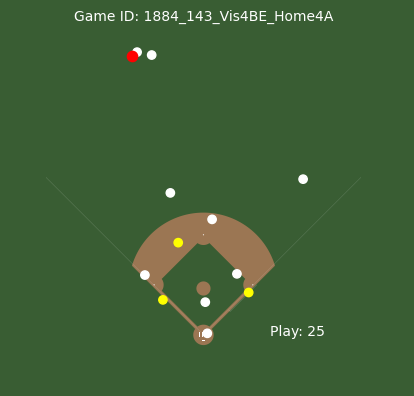

In [56]:
player_pos = pd.read_parquet('./Combined/player_pos/1884_143_Vis4BE_Home4A.parquet')
ball_pos = pd.read_parquet('./Combined/ball_pos/1884_143_Vis4BE_Home4A.parquet')

plot_animation(player_pos, ball_pos, play_id = 25, save_gif=True)

In [14]:
unique_teams = team_info.groupby('player_id')['home_team'].nunique().sort_values(ascending = False).reset_index()


positions = game_info.iloc[:, 7:16]

players = {}
for position in positions.columns:
    players[position] = set(positions[position].dropna())
    
    
for position, ids in players.items():
    for id_ in ids:
        team_indices = unique_teams.index[unique_teams['player_id'] == id_].tolist()
        unique_teams.loc[team_indices, 'position'] = position
        
unique_teams[unique_teams['home_team'] > 1]['position'].value_counts()

position
pitcher         42
right_field     10
shortstop        7
catcher          6
center_field     5
left_field       4
third_base       4
first_base       3
second_base      2
Name: count, dtype: int64